### Clean Juneau Snow Depth Timeseries Data 

Notebook contents 
* Load the Powder Patch data, and the SNOTEL data, and clean them together here 
* Produce a few figures of them together 

created by Cassie Lumbrazo\
last updated: Oct 2025\
run location: UAS linux\
python environment: **xarray**

In [137]:
# import packages 
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import scipy

In [138]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
from matplotlib import ticker

In [139]:
pwd

'/home/cassie/python/repos/snowdepth_teleconnections'

SNOTEL Data first loaded in `2_snotel_data.ipynb`

In [140]:
filename = '/hdd/snow_hydrology/met_station/snotel/heenlatinee/site1270_hourly_2016_2025.nc' # lightly cleaned snotel data 

# open the netcdf 
ds_site1270 = xr.open_dataset(filename)
ds_site1270

<xarray.Dataset> Size: 8MB
Dimensions:   (datetime: 79654)
Coordinates:
  * datetime  (datetime) datetime64[ns] 637kB 2015-10-01 ... 2025-09-30T23:00:00
Data variables:
    site_id   (datetime) int32 319kB ...
    swe       (datetime) float64 637kB ...
    precip1   (datetime) float64 637kB ...
    precip2   (datetime) float64 637kB ...
    temp      (datetime) float64 637kB ...
    hs        (datetime) float64 637kB ...
    bat       (datetime) float64 637kB ...
    wdir      (datetime) float64 637kB ...
    ws_x      (datetime) float64 637kB ...
    ws_v      (datetime) float64 637kB ...
    rh        (datetime) float64 637kB ...
    pres      (datetime) float64 637kB ...

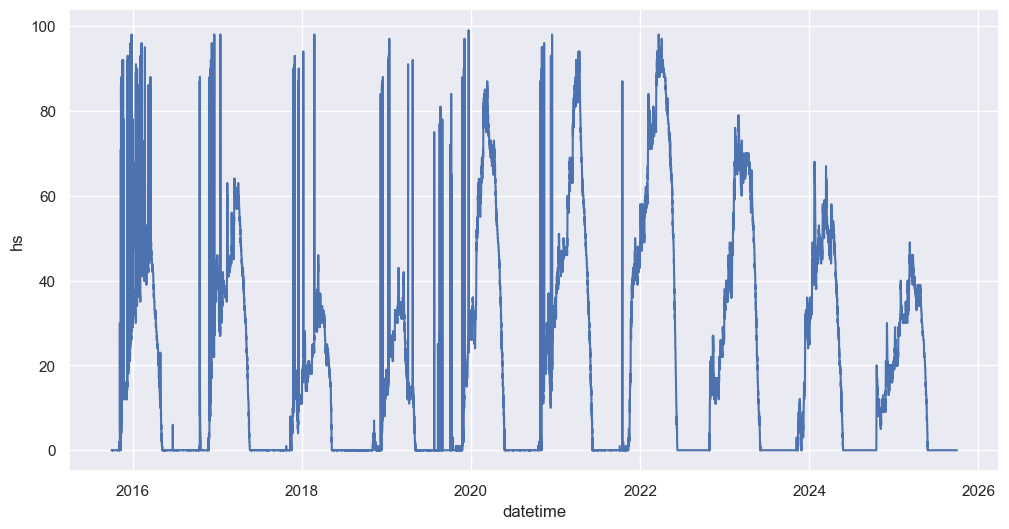

In [141]:
ds_site1270['hs'].plot()

Open Tram Site Data

In [142]:
filename = '/hdd/snow_hydrology/met_station/tram/JTMA2_MountRoberts_Tram_Synoptic_everything_utc_until_2025-10-08.csv'
df_tram = pd.read_csv(filename, sep = ",", low_memory=False, skiprows=10)
df_tram['datetime'] = pd.to_datetime(df_tram['Date_Time'], utc=True)
# set datetime as the index
df_tram = df_tram.iloc[1:].copy() # skipping that first row since it's the units row
df_tram.set_index('datetime', inplace=True)
df_tram.head()

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,wind_speed_set_1,wind_direction_set_1,wind_gust_set_1,snow_depth_set_1,solar_radiation_set_1,precip_accum_set_1,volt_set_1,snow_interval_set_1,wind_chill_set_1d,wind_cardinal_direction_set_1d,heat_index_set_1d,dew_point_temperature_set_1d
datetime,,,,,,,,,,,,,,,,
2014-08-27 03:00:00+00:00,JTMA2,2014-08-27T03:00:00Z,8.92,100.0,NaN,NaN,NaN,NaN,NaN,1.524,NaN,NaN,NaN,NaN,NaN,8.92
2014-08-27 03:15:00+00:00,JTMA2,2014-08-27T03:15:00Z,8.9,100.0,NaN,NaN,NaN,NaN,NaN,0.508,NaN,NaN,NaN,NaN,NaN,8.9
2014-08-27 03:30:00+00:00,JTMA2,2014-08-27T03:30:00Z,8.83,100.0,NaN,NaN,NaN,NaN,NaN,0.508,NaN,NaN,NaN,NaN,NaN,8.83
2014-08-27 03:45:00+00:00,JTMA2,2014-08-27T03:45:00Z,8.8,100.0,NaN,NaN,NaN,NaN,NaN,0.508,NaN,NaN,NaN,NaN,NaN,8.8
2014-08-27 04:00:00+00:00,JTMA2,2014-08-27T04:00:00Z,8.8,100.0,NaN,NaN,NaN,NaN,NaN,0.762,NaN,NaN,NaN,NaN,NaN,8.8


<Axes: xlabel='datetime'>

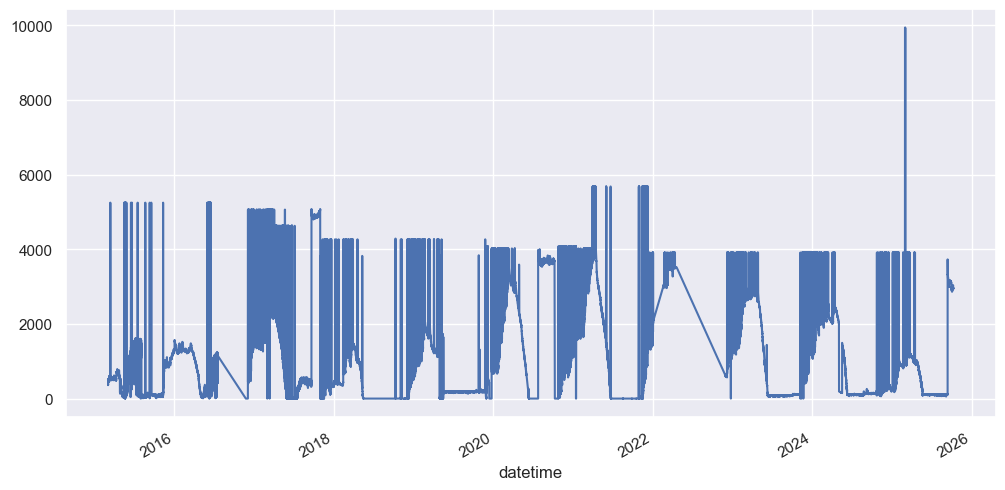

In [143]:
df_tram['snow_depth_set_1'] = pd.to_numeric(df_tram['snow_depth_set_1'], errors='coerce')
df_tram['snow_depth_set_1'].plot()

<Axes: xlabel='datetime'>

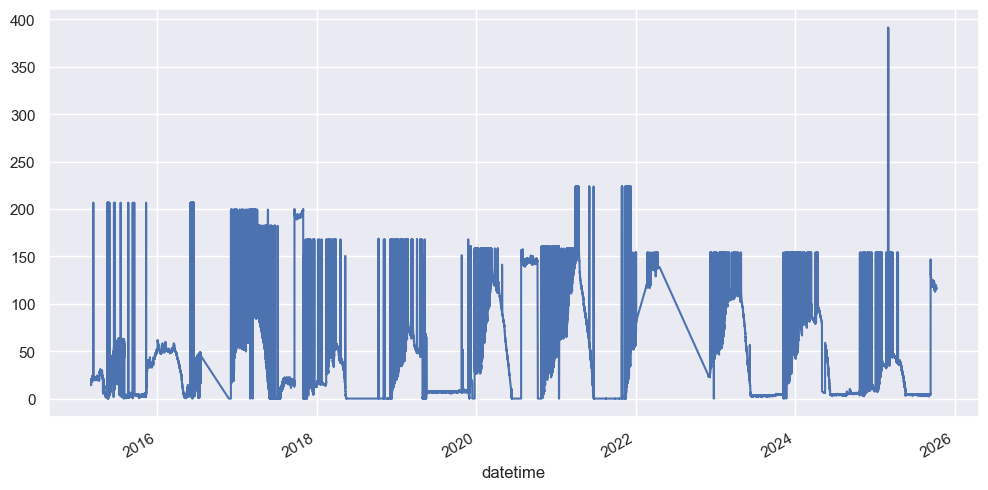

In [144]:
# convert mm to inches 
df_tram['snow_depth_set_1_inches'] = df_tram['snow_depth_set_1'] / 25.4  # convert mm to inches
df_tram['snow_depth_set_1_inches'].plot()

<Axes: xlabel='datetime'>

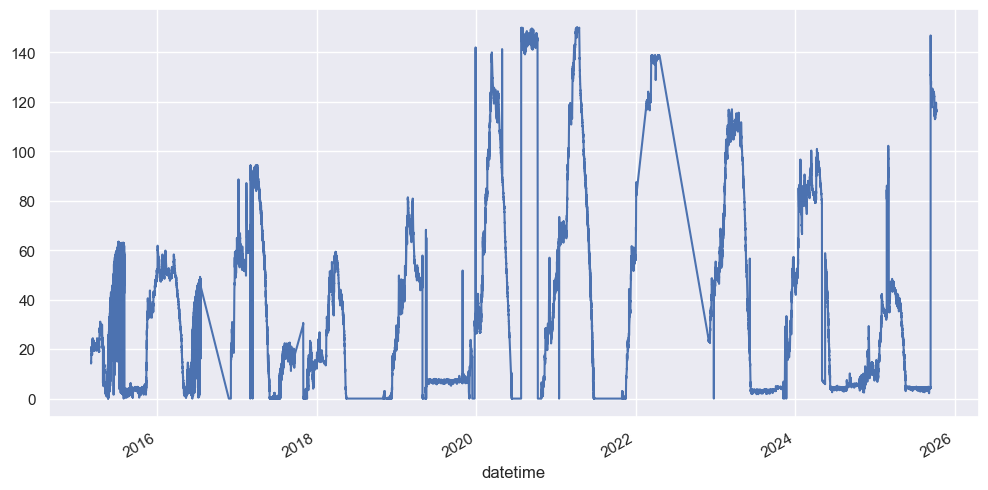

In [145]:
# drop any values above 150 and below 0 
df_tram_clean = df_tram[(df_tram['snow_depth_set_1_inches'] <= 150) & (df_tram['snow_depth_set_1_inches'] >= 0)]
df_tram_clean['snow_depth_set_1_inches'].plot()

<Axes: xlabel='datetime'>

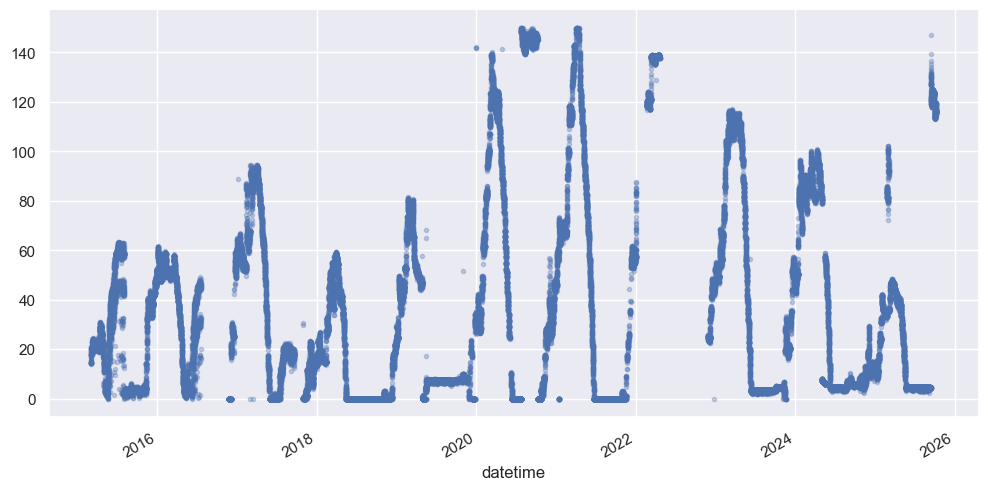

In [146]:
df_tram_clean['snow_depth_set_1_inches'].plot(marker='.', linestyle='None', alpha=0.3)

Now, I need to do the same for the Powder Patch dataset (lightly cleaned in `1_load_all_powderpatch.ipynb` then saved as netcdf)

In [147]:
# For now, I am just loadign the raw data from synoptic but I should go back and get the microspecialties download + mesonet to make the full dataset 
filename = '/home/cassie/data/fishcreek/mesowest/rawdata/PPSA2_Synoptic_everything_utc_time_remove_header.csv'
df_pp = pd.read_csv(filename, sep = ",", low_memory=False)

# Convert 'Date_Time' to datetime, skipping the first row (units row)
df_pp = df_pp.iloc[1:].copy()
df_pp['datetime'] = pd.to_datetime(df_pp['Date_Time'], utc=True)
# set datetime as the index
df_pp.set_index('datetime', inplace=True)
df_pp.head()

,Station_ID,Date_Time,air_temp_set_1,relative_humidity_set_1,snow_depth_set_1,precip_accum_set_1,volt_set_1,snow_interval_set_1,heat_index_set_1d,dew_point_temperature_set_1d
datetime,,,,,,,,,,
2014-01-09 15:00:00+00:00,PPSA2,2014-01-09T15:00:00Z,-1.43,91.9,NaN,NaN,NaN,NaN,NaN,-2.59
2014-01-09 15:30:00+00:00,PPSA2,2014-01-09T15:30:00Z,-1.38,92.0,NaN,NaN,NaN,NaN,NaN,-2.53
2014-01-09 16:00:00+00:00,PPSA2,2014-01-09T16:00:00Z,-1.38,91.9,NaN,NaN,NaN,NaN,NaN,-2.54
2014-01-09 16:30:00+00:00,PPSA2,2014-01-09T16:30:00Z,-1.38,91.9,NaN,NaN,NaN,NaN,NaN,-2.54
2014-01-09 17:00:00+00:00,PPSA2,2014-01-09T17:00:00Z,-1.38,91.8,NaN,NaN,NaN,NaN,NaN,-2.56


<Axes: xlabel='datetime'>

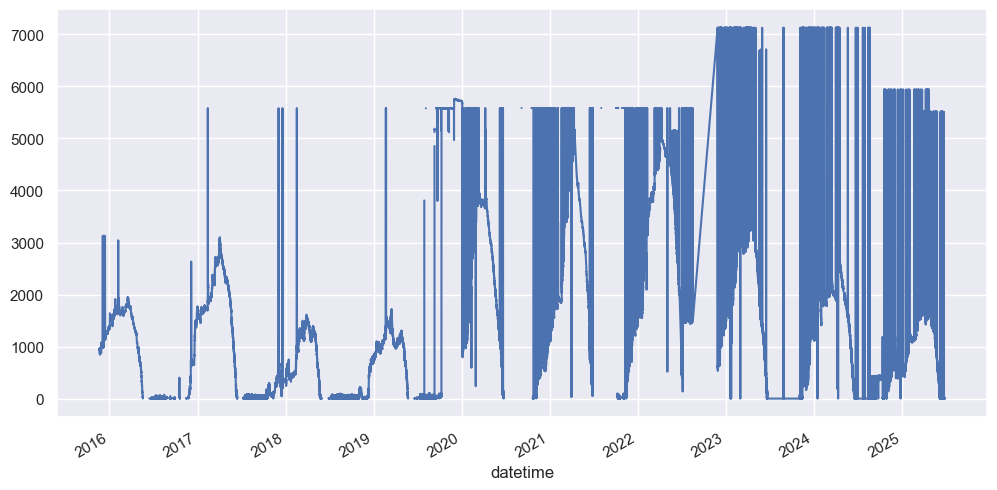

In [148]:
df_pp['snow_depth_set_1'] = pd.to_numeric(df_pp['snow_depth_set_1'], errors='coerce')
df_pp['snow_depth_set_1'].plot()

In [149]:
# convert mm to inches 
df_pp['snow_depth_set_1_inches'] = df_pp['snow_depth_set_1'] / 25.4  # convert mm to inches

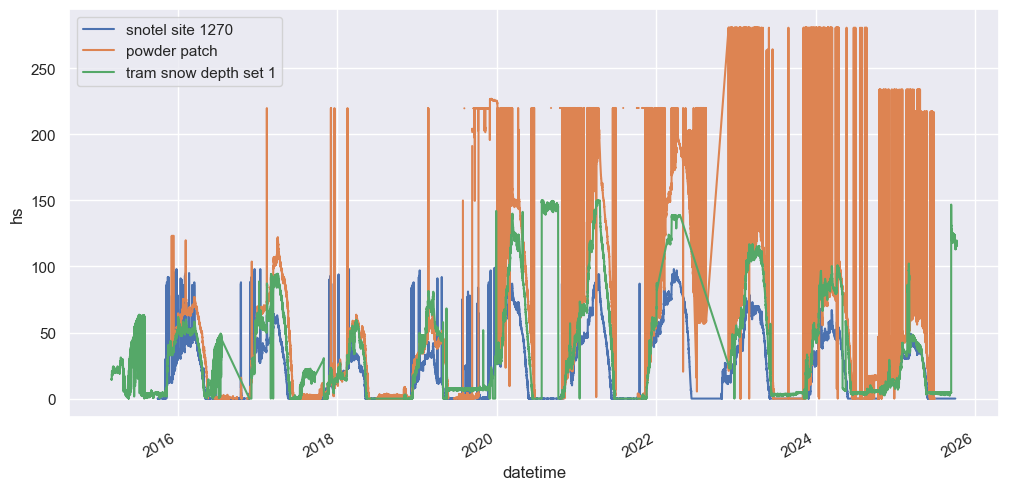

In [150]:
ds_site1270['hs'].plot()
df_pp['snow_depth_set_1_inches'].plot()
df_tram_clean['snow_depth_set_1_inches'].plot()

plt.legend(['snotel site 1270', 'powder patch', 'tram snow depth set 1'])

Fix timezones for everything to make timezone naive so that we can combine into a single dataset 

In [151]:
# first, make both dataframes timezone-naive so that we can join 
df_pp_naive = df_pp.copy()
df_pp_naive.index = df_pp_naive.index.tz_localize(None)
df_pp_naive.index.name = 'datetime'

df_tram_naive = df_tram_clean.copy()
df_tram_naive.index = df_tram_naive.index.tz_localize(None)
df_tram_naive.index.name = 'datetime'

In [152]:
ds_site1270_pandas = ds_site1270.to_dataframe()
ds_site1270_pandas.index = ds_site1270_pandas.index.tz_localize(None)

In [153]:
ds_site1270_pandas = ds_site1270_pandas[~ds_site1270_pandas.index.duplicated(keep='first')]
df_pp_naive = df_pp_naive[~df_pp_naive.index.duplicated(keep='first')]
df_tram_naive = df_tram_naive[~df_tram_naive.index.duplicated(keep='first')]

In [154]:
df_snow = pd.concat(
    [
        ds_site1270_pandas['hs'].rename('snotel'),
        df_pp_naive['snow_depth_set_1_inches'].rename('powderpatch'),
        df_tram_naive['snow_depth_set_1_inches'].rename('tram')
    ],
    axis=1
)


<Axes: xlabel='datetime'>

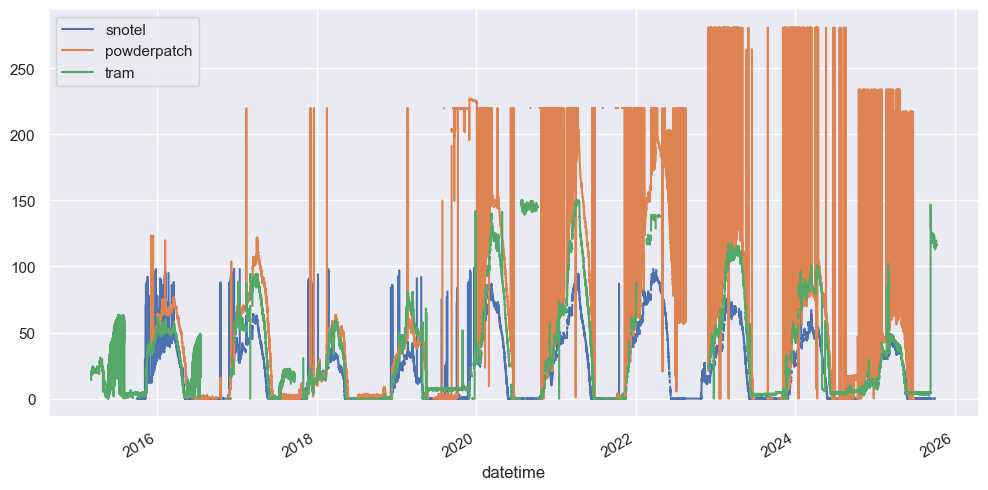

In [155]:
df_snow.plot()

<Axes: xlabel='datetime'>

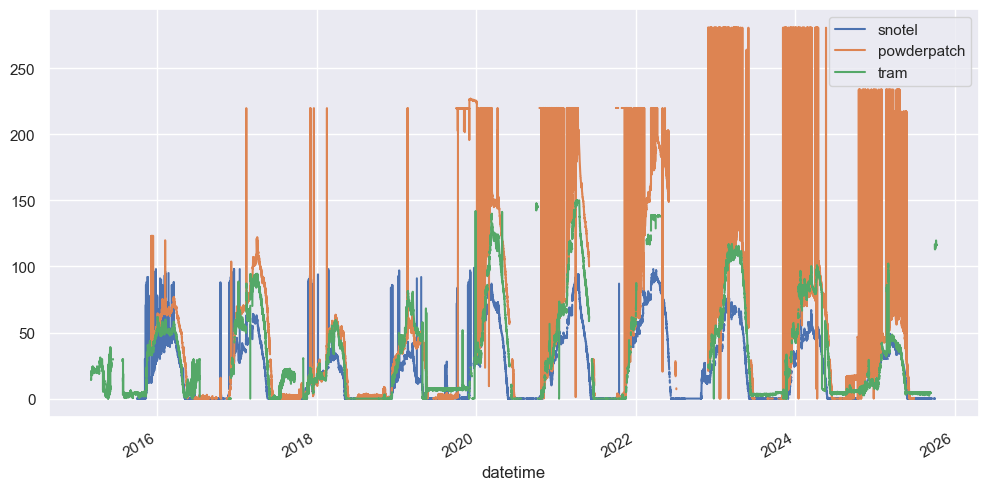

In [156]:
# Replace snow depth values >30 in June–October with NaN
summer_months = [6, 7, 8, 9]
df_snow.loc[df_snow.index.month.isin(summer_months) & (df_snow['powderpatch'] > 30), 'powderpatch'] = np.nan
df_snow.loc[df_snow.index.month.isin(summer_months) & (df_snow['snotel'] > 30), 'snotel'] = np.nan
df_snow.loc[df_snow.index.month.isin(summer_months) & (df_snow['tram'] > 30), 'tram'] = np.nan
df_snow.plot()

<Axes: xlabel='datetime'>

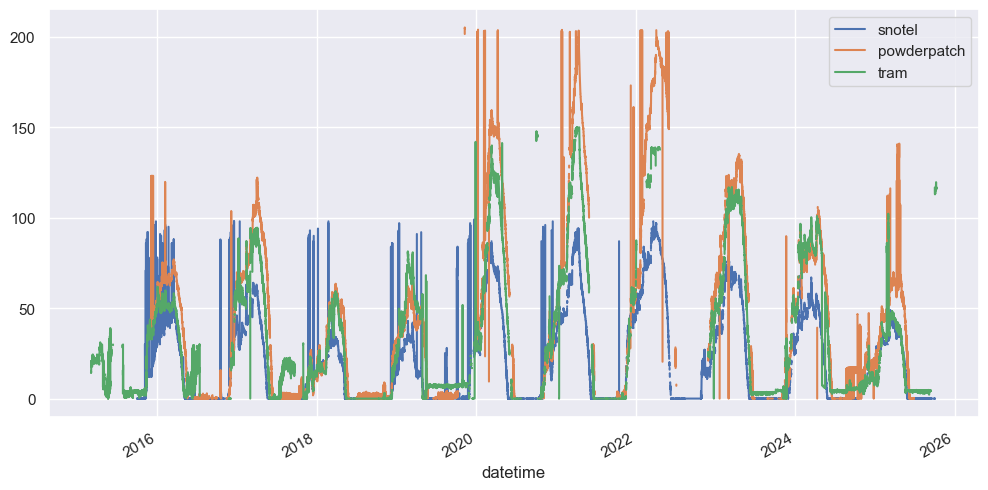

In [157]:
# and remove all values above 210, make nan 
df_snow.loc[df_snow['powderpatch'] > 210, 'powderpatch'] = np.nan
df_snow.loc[df_snow['snotel'] > 210, 'snotel'] = np.nan
df_snow.plot()

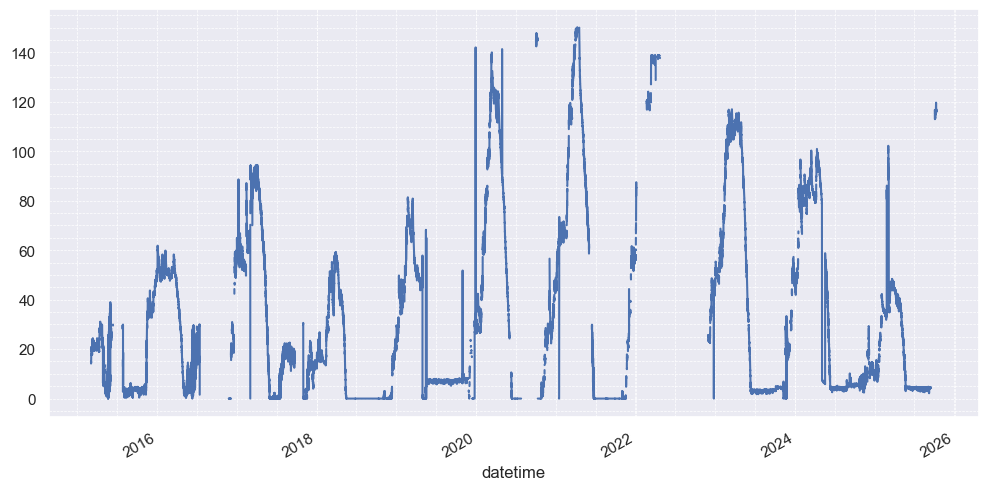

In [158]:
# df_snow['powderpatch'].plot()
# df_snow['snotel'].plot()
df_snow['tram'].plot()
# add extra gridlines for every 10 units
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()

Clean up max values for each water year and variable to start...

In [159]:
# 1: Define water year from datetime index ---
def water_year(dt):
    """Return the water year for a given datetime (Oct–Sep)."""
    return dt.year + 1 if dt.month >= 10 else dt.year

df_snow['WY'] = df_snow.index.map(water_year)

# 2: Define max allowable values per year ---
max_values = {
    2016: {'powderpatch': 90, 'snotel': 60, 'tram': 150},
    2017: {'powderpatch': 130, 'snotel': 70, 'tram': 150},
    2018: {'powderpatch': 70, 'snotel': 50, 'tram': 150},
    2019: {'powderpatch': 80, 'snotel': 50, 'tram': 150},
    2020: {'powderpatch': 170, 'snotel': 85, 'tram': 150},
    2021: {'powderpatch': 200, 'snotel': 95, 'tram': 150},
    2022: {'powderpatch': 200, 'snotel': 100, 'tram': 1500},
    2023: {'powderpatch': 150, 'snotel': 100, 'tram': 1500},
    2024: {'powderpatch': 150, 'snotel': 60, 'tram': 150},
    2025: {'powderpatch': 100, 'snotel': 60, 'tram': 150},
}

# 3: Apply thresholds per water year ---
def apply_thresholds(row):
    wy = row['WY']
    if wy in max_values:
        thresholds = max_values[wy]
        # replace with NaN if exceeding threshold
        if row['powderpatch'] > thresholds['powderpatch']:
            row['powderpatch'] = np.nan
        if row['snotel'] > thresholds['snotel']:
            row['snotel'] = np.nan
    return row

df_snow = df_snow.apply(apply_thresholds, axis=1)

<Axes: xlabel='datetime'>

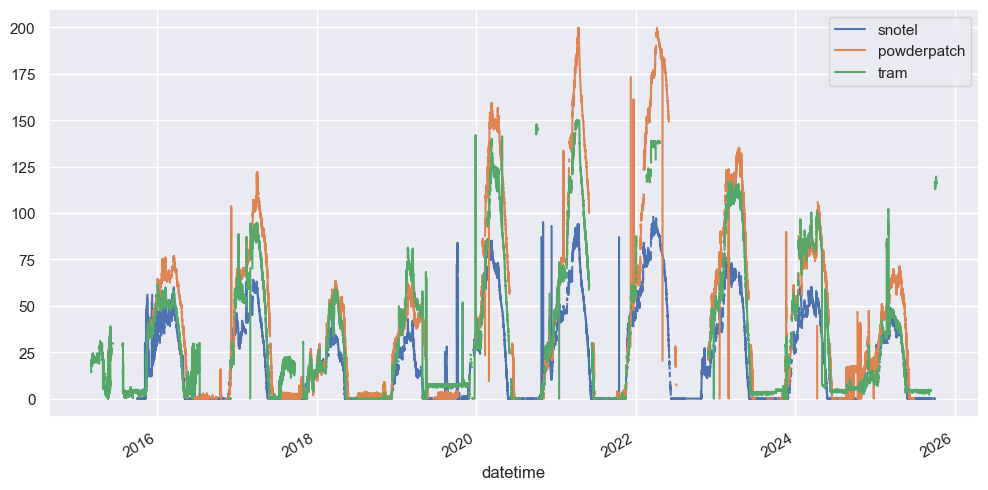

In [160]:
df_snow.drop(columns=['WY'], inplace=True)
df_snow.plot()

Text(0, 0.5, 'snow depth (in)')

<Figure size 1500x500 with 0 Axes>

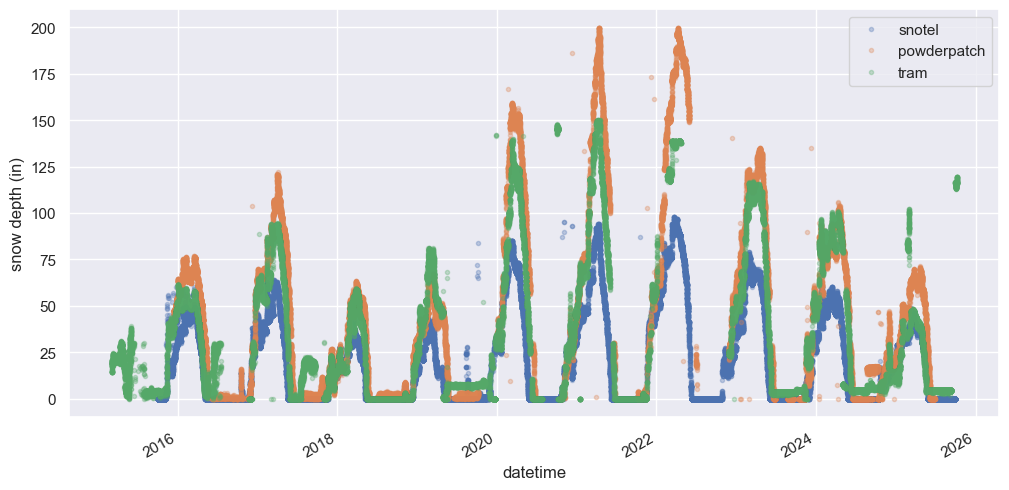

In [161]:
# figure size 
plt.figure(figsize=(15, 5))
df_snow.plot(marker='.', linestyle='None', alpha=0.3)
plt.ylabel('snow depth (in)')

### Smoothing

Weird method...

In [162]:
# # Now use non-parametric lowees to clean the two variables in the timeseries
# df_snow_clean = df_snow.copy()
# df_snow_clean['snotel_clean'] = scipy.signal.savgol_filter(df_snow['snotel'], window_length=25, polyorder=2)
# df_snow_clean['powderpatch_clean'] = scipy.signal.savgol_filter(df_snow['powderpatch'], window_length=25, polyorder=2)
# df_snow_clean.plot()

In [163]:
# # Now use non-parametric lowees to clean the two variables in the timeseries
# length = 10
# order = 2

# df_snow_clean = df_snow.copy()
# df_snow_clean['snotel'] = scipy.signal.savgol_filter(df_snow['snotel'], window_length=length, polyorder=order)
# df_snow_clean['powderpatch'] = scipy.signal.savgol_filter(df_snow['powderpatch'], window_length=length, polyorder=order)
# df_snow_clean.plot()

### LOWESS Smoothing

In [130]:
from statsmodels.nonparametric.smoothers_lowess import lowess


In [164]:
df_snow_smooth = df_snow.copy()

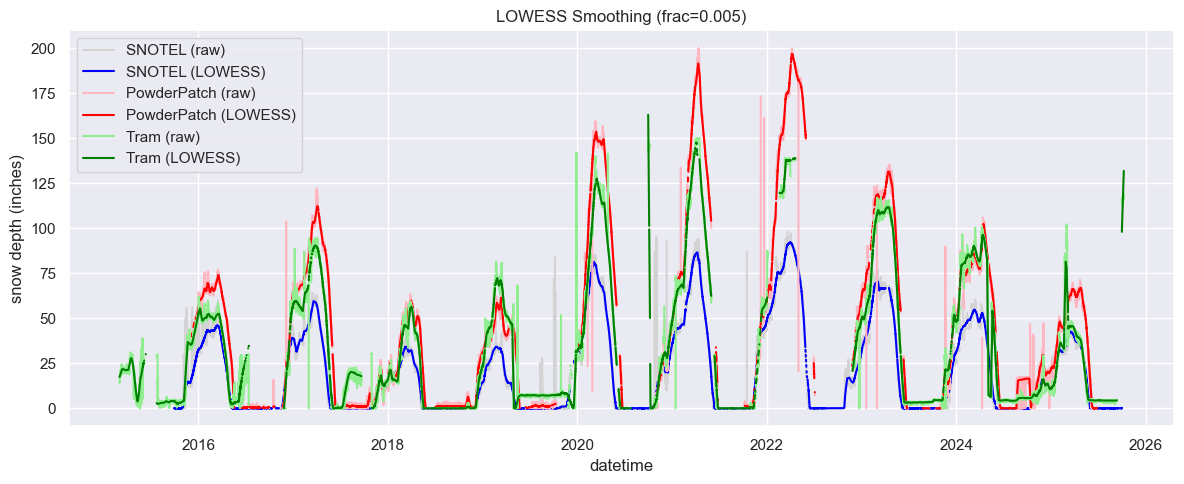

In [165]:
# Set smoothing fraction (adjust 0.02–0.05 for more/less smoothing)
# frac = 0.02
frac = 0.005

# Apply LOWESS smoothing to each variable
lowess_snotel = lowess(df_snow_smooth['snotel'], df_snow_smooth.index.values, frac=frac, return_sorted=False)
lowess_powerpatch = lowess(df_snow_smooth['powderpatch'], df_snow_smooth.index.values, frac=frac, return_sorted=False)
lowess_tram = lowess(df_snow_smooth['tram'], df_snow_smooth.index.values, frac=frac, return_sorted=False)

# Add to dataframe
df_snow_smooth['snotel_smooth'] = lowess_snotel
df_snow_smooth['powderpatch_smooth'] = lowess_powerpatch
df_snow_smooth['tram_smooth'] = lowess_tram

# Replace negative smoothed values with NaN
df_snow_smooth.loc[df_snow_smooth['snotel_smooth'] < 0, 'snotel_smooth'] = np.nan
df_snow_smooth.loc[df_snow_smooth['powderpatch_smooth'] < 0, 'powderpatch_smooth'] = np.nan
df_snow_smooth.loc[df_snow_smooth['tram_smooth'] < 0, 'tram_smooth'] = np.nan

# Plot comparison
plt.figure(figsize=(12, 5))
plt.plot(df_snow_smooth.index, df_snow_smooth['snotel'], color='lightgray', label='SNOTEL (raw)')
plt.plot(df_snow_smooth.index, df_snow_smooth['snotel_smooth'], color='blue', label='SNOTEL (LOWESS)')
plt.plot(df_snow_smooth.index, df_snow_smooth['powderpatch'], color='lightpink', label='PowderPatch (raw)')
plt.plot(df_snow_smooth.index, df_snow_smooth['powderpatch_smooth'], color='red', label='PowderPatch (LOWESS)')
plt.plot(df_snow_smooth.index, df_snow_smooth['tram'], color='lightgreen', label='Tram (raw)')
plt.plot(df_snow_smooth.index, df_snow_smooth['tram_smooth'], color='green', label='Tram (LOWESS)')

plt.legend()
plt.title(f"LOWESS Smoothing (frac={frac})")
plt.xlabel("datetime")
plt.ylabel("snow depth (inches)")
plt.tight_layout()
plt.show()

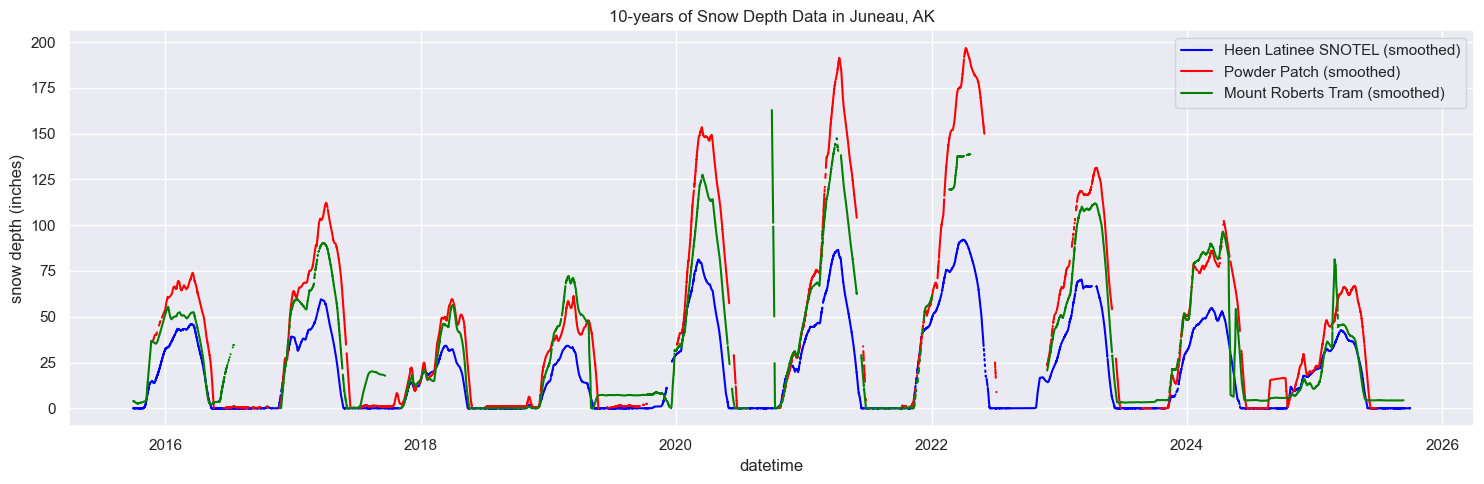

In [176]:
# Plot comparison
plt.figure(figsize=(15, 5))
# plt.plot(df_snow_smooth.index, df_snow_smooth['snotel'], color='lightgray', label='Heen Latinee SNOTEL (raw)')
plt.plot(df_snow_smooth.index, df_snow_smooth['snotel_smooth'], color='blue', label='Heen Latinee SNOTEL (smoothed)')
# plt.plot(df_snow_smooth.index, df_snow_smooth['powderpatch'], color='lightpink', label='Powder Patch (raw)')
plt.plot(df_snow_smooth.index, df_snow_smooth['powderpatch_smooth'], color='red', label='Powder Patch (smoothed)')
# plt.plot(df_snow_smooth.index, df_snow_smooth['tram'], color='lightgreen', label='Mount Roberts Tram (raw)')
plt.plot(df_snow_smooth.index, df_snow_smooth['tram_smooth'], color='green', label='Mount Roberts Tram (smoothed)')

plt.legend()
plt.title('10-years of Snow Depth Data in Juneau, AK')
plt.xlabel("datetime")
plt.ylabel("snow depth (inches)")
plt.tight_layout()
plt.show()

In [174]:
# drop any data after Sept 2025
df_snow_smooth = df_snow_smooth[df_snow_smooth.index < '2025-10-01']

# drop any data before Oct 2015
df_snow_smooth = df_snow_smooth[df_snow_smooth.index >= '2015-10-01']

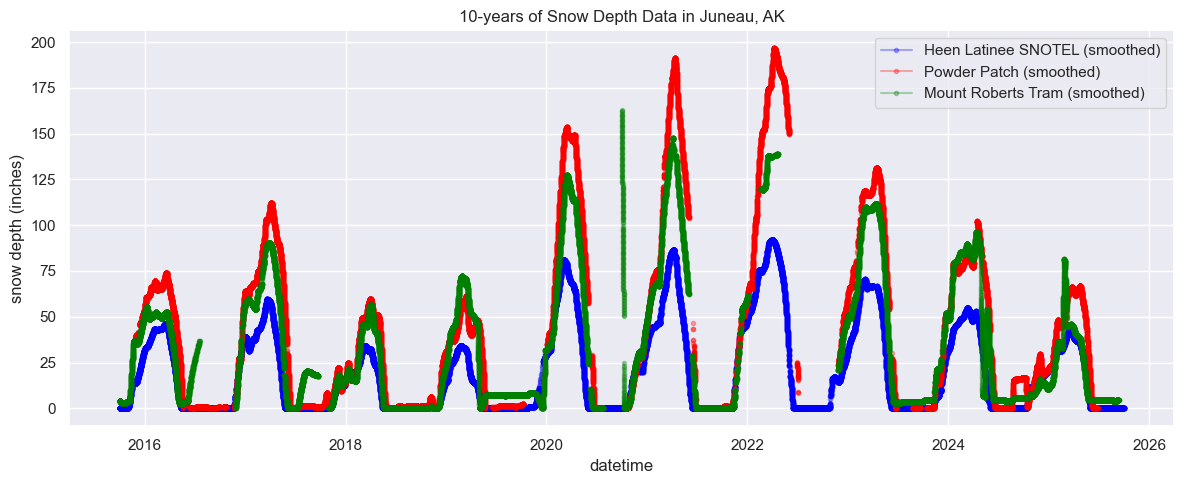

In [ ]:
# Plot comparison
plt.figure(figsize=(15, 5))
plt.plot(df_snow_smooth.index, df_snow_smooth['snotel_smooth'], color='blue', label='Heen Latinee SNOTEL (smoothed)', marker='.', alpha=0.3)
plt.plot(df_snow_smooth.index, df_snow_smooth['powderpatch_smooth'], color='red', label='Powder Patch (smoothed)', marker='.', alpha=0.3)
plt.plot(df_snow_smooth.index, df_snow_smooth['tram_smooth'], color='green', label='Mount Roberts Tram (smoothed)', marker='.', alpha=0.3)

plt.legend()
plt.title('10-years of Snow Depth Data in Juneau, AK')
plt.xlabel("datetime")
plt.ylabel("snow depth (inches)")
plt.tight_layout()
plt.show()